<a href="https://colab.research.google.com/github/abou-S/Controle-de-la-police/blob/main/Arrestations_de_la_police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Stop_Data_2019_to_2022.csv')

<ipython-input-4-df0e767e1323>:1: DtypeWarning: Columns (7,26,30,35,38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data/Stop_Data_2019_to_2022.csv')


In [ ]:
df.shape

(279936, 63)

In [ ]:
# --- 1️⃣ Aperçu du dataset ---
print("\n🔹 Aperçu du dataset :")
print(df.info())


🔹 Aperçu du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279936 entries, 0 to 279935
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CCN_ANONYMIZED              118088 non-null  object 
 1   STOP_TYPE                   279936 non-null  object 
 2   DATETIME                    279936 non-null  object 
 3   STOP_LOCATION               277744 non-null  object 
 4   STOP_DISTRICT               277450 non-null  float64
 5   STOP_DURATION_MINS          277305 non-null  float64
 6   STOP_REASON_NONTICKET       118070 non-null  object 
 7   STOP_REASON_HARBOR          1111 non-null    object 
 8   STOP_REASON_TICKET          163036 non-null  object 
 9   PERSON_SEARCH_PAT_DOWN      279936 non-null  int64  
 10  PROPERTY_SEARCH_PAT_DOWN    279936 non-null  int64  
 11  PERSON_SEARCH_CONSENT       279936 non-null  int64  
 12  PERSON_SEARCH_PROB_CAUSE    279936 non-null  int6

In [ ]:
print("\n🔹 Aperçu des premières lignes :")
df.head()


🔹 Aperçu des premières lignes :


,CCN_ANONYMIZED,STOP_TYPE,DATETIME,STOP_LOCATION,STOP_DISTRICT,STOP_DURATION_MINS,STOP_REASON_NONTICKET,STOP_REASON_HARBOR,STOP_REASON_TICKET,PERSON_SEARCH_PAT_DOWN,...,HARBOR,INVESTIGATIVE,TRAFFIC_INVOLVED,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,df8eab5aa9c8055c8ec149204d376beeb422e182bbbb71...,Non-ticket Stop,2021/12/29 13:00:00+00,"300 BLOCK OF 33RD DC, DC 20019 UNITED STATES",6.0,30.0,Call for service,NaN,NaN,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,280321,{96FB2C7A-1B0A-45F2-9A65-0B900CD8E87A}
1,364201002193313ae4b99e8455517ec24ce28a63d5446d...,Non-ticket Stop,2021/12/29 13:48:00+00,NaN,4.0,7.0,Call for service,NaN,NaN,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,280322,{C0F1EC59-8B26-4618-86B0-3A0C480DB33E}
2,367f1304e9ac5c4bb5bbd42fc75091ec689f5a45cbc385...,Non-ticket Stop,2021/12/29 15:07:00+00,"3700 BLOCK OF MINNESOTA AVENUE NE WASHINGTON, ...",6.0,3.0,Call for service,NaN,NaN,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,280323,{0BB100B4-A06A-467C-91FC-95558659796A}
3,c25fb89c2c556d230540a574de9b48e7ba2317f584a55d...,Non-ticket Stop,2021/12/29 15:00:00+00,"4100 BLOCK OF 1ST DC, WASHINGTON 20032 UNITED ...",NaN,30.0,Call for service,NaN,NaN,1,...,0,1,0,NaN,NaN,NaN,NaN,NaN,280324,{570F50DD-47E4-4CF6-803E-AB82753B9CE1}
4,c25fb89c2c556d230540a574de9b48e7ba2317f584a55d...,Non-ticket Stop,2021/12/29 15:00:00+00,"4100 BLOCK OF 1ST DC, WASHINGTON 20032 UNITED ...",NaN,30.0,Call for service,NaN,NaN,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,280325,{EF316A0F-77C9-4710-923A-DFA41CDA546F}


In [ ]:
# --- 2️⃣ Vérification des valeurs manquantes ---
print("\n🔹 Valeurs manquantes par colonne :")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


🔹 Valeurs manquantes par colonne :
CCN_ANONYMIZED                161848
STOP_LOCATION                   2192
STOP_DISTRICT                   2486
STOP_DURATION_MINS              2631
STOP_REASON_NONTICKET         161866
STOP_REASON_HARBOR            278825
STOP_REASON_TICKET            116900
PERSON_SEARCH_REA_CONSENT     274815
PERSON_SRCH_PROB_CAUSE        273142
PERSON_PAT_DOWN_REASON        264919
PERSON_SRCH_REASON_WARRANT    277706
PROP_SRCH_REASON_CONSENT      276221
PROP_SRCH_PROB_CAUSE          275859
PROP_PAT_DOWN_REASON          278537
PROP_SRCH_REASON_WARRANT      278896
PROPERTY_SRCH_OBJ_CONSENT     276221
PROP_SRCH_OBJ_PROB_CAUSE      275859
PROP_PAT_DOWN_OBJ             278537
PROP_SRCH_OBJ_WARRANT         278896
PERSON_SRCH_OBJ_SEIZED_CON    275343
PERSON_SRCH_OBJ_PROB_CAUSE    274014
PER_PRO_PAT_DOWN_OBJ_SEIZE    268520
PERSON_SRCH_OBJ_SEIZED_WAR    278080
PROP_SRCH_OBJ_SEIZE_CON       276930
PROP_SRCH_OBJ_SEIZE_CAUSE     276496
PROP_PAT_DOWN_OBJ_SEIZED      278860
PR

In [ ]:
# --- 3️⃣ Vérification des doublons ---
print("\n🔹 Nombre de doublons :", df.duplicated().sum())


🔹 Nombre de doublons : 0


In [ ]:
df.describe()

,STOP_DISTRICT,STOP_DURATION_MINS,PERSON_SEARCH_PAT_DOWN,PROPERTY_SEARCH_PAT_DOWN,PERSON_SEARCH_CONSENT,PERSON_SEARCH_PROB_CAUSE,PERSON_PROT_PAT_DOWN,PERSON_SEARCH_WARRANT,PROPERTY_SEARCH_CONSENT,PROPERTY_SEARCH_PROB_CAUSE,...,PEDESTRIAN,HARBOR,INVESTIGATIVE,TRAFFIC_INVOLVED,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID
count,277450.000000,2.773050e+05,279936.000000,279936.000000,279936.000000,279936.000000,279936.000000,279936.000000,279936.000000,279936.000000,...,279936.000000,279936.000000,279936.000000,279936.000000,0.0,0.0,0.0,0.0,0.0,279936.000000
mean,3.938393,3.432044e+03,0.116348,0.037812,0.019647,0.026595,0.061811,0.008727,0.013271,0.014564,...,0.002354,0.003969,0.421839,0.641600,NaN,NaN,NaN,NaN,NaN,420288.500000
std,1.995654,1.271222e+06,0.320642,0.190742,0.138785,0.160898,0.240812,0.093010,0.114433,0.119800,...,0.048462,0.062873,0.493854,0.479531,NaN,NaN,NaN,NaN,NaN,80810.706815
min,1.000000,-1.007500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,280321.000000
25%,2.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,350304.750000
50%,4.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,420288.500000
75%,6.000000,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,490272.250000
max,7.000000,4.733539e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,560256.000000


In [ ]:
# --- 4️⃣ Analyse univariée ---
# Variables catégoriques
def plot_categorical(col):
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Controle effectué par {col}")
    plt.show()

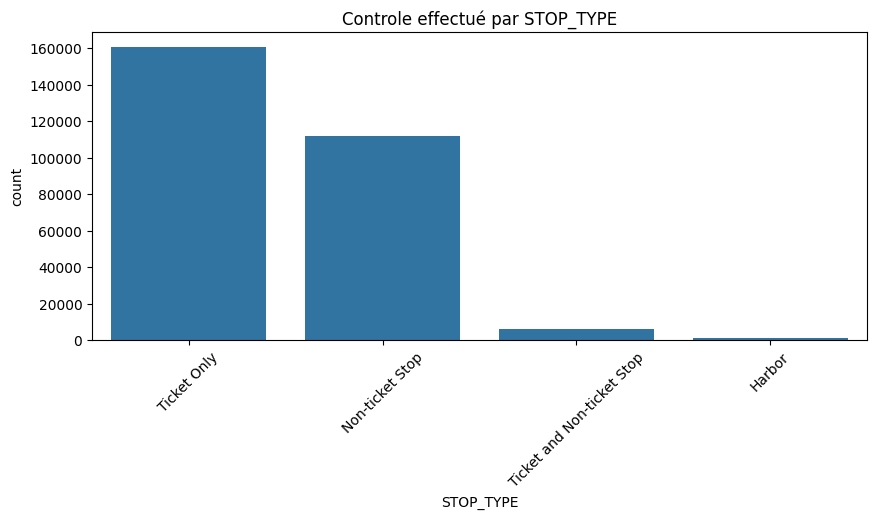

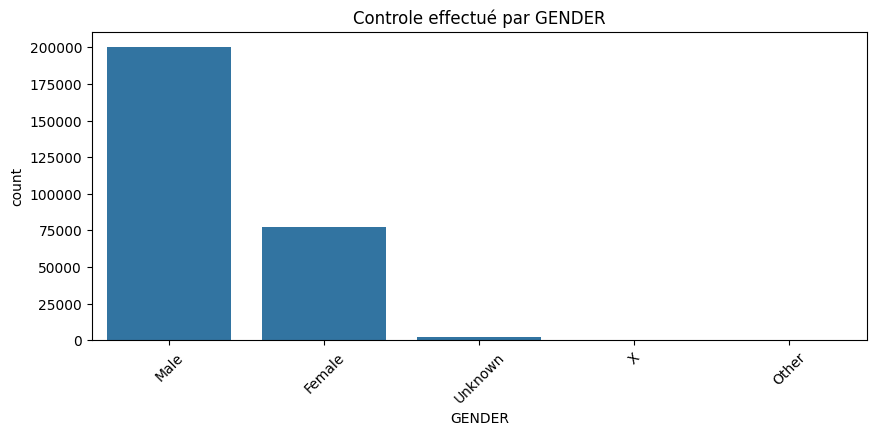

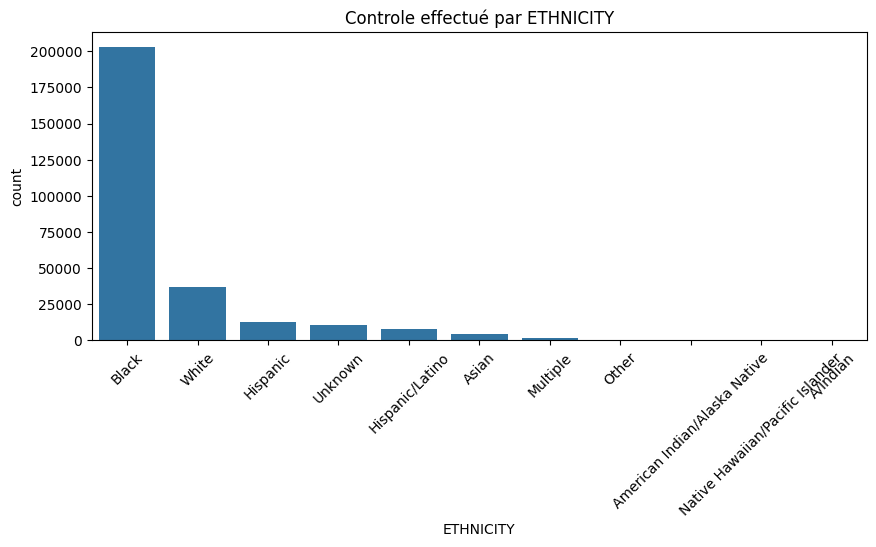

In [ ]:
cat_cols = ['STOP_TYPE', 'GENDER', 'ETHNICITY']  # Modifie selon tes données
for col in cat_cols:
    plot_categorical(col)

In [ ]:
df[df['STOP_TYPE'] == 'Ticket and Non-ticket Stop']['VOIDED_TICKETS'].value_counts()

,count
VOIDED_TICKETS,
T113,15
T128,7
T758,7
T058,6
T745,6
...,...
T822,1
T742,1
T005;T005,1


In [ ]:
# Variables numériques
def plot_numeric(col):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

In [ ]:
df['AGE'].value_counts()

,count
AGE,
Juvenile,7973
27,7807
29,7760
28,7723
26,7556
...,...
90,8
90.0,6
87.0,5


In [ ]:
# Methode pour catégoriser les âges
def categorize_age(age):
  if age == 'Juvenile':
    return 'Juvenile'
  elif age == 'Unknown' or pd.isna(age):
    return 'Unknown'
  else:
    age = int(age)
    if 18 <= age <= 24:
      return 'Young Adult (18-24)'
    elif 25 <= age <= 39:
      return 'Adult (25-39)'
    elif 40 <= age <= 64:
      return 'Middle Aged (40-64)'
    else:
      return 'Senior (65+)'

df['Age_Category'] = df['AGE'].apply(categorize_age)
print(df['Age_Category'].value_counts())

Age_Category
Adult (25-39)          121427
Middle Aged (40-64)     86593
Young Adult (18-24)     41567
Unknown                 12214
Senior (65+)            10162
Juvenile                 7973
Name: count, dtype: int64


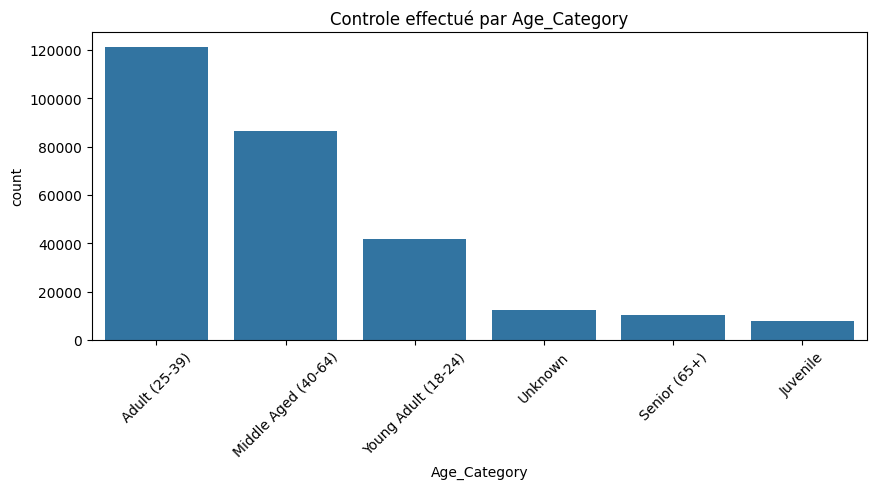

In [ ]:
plot_categorical('Age_Category')

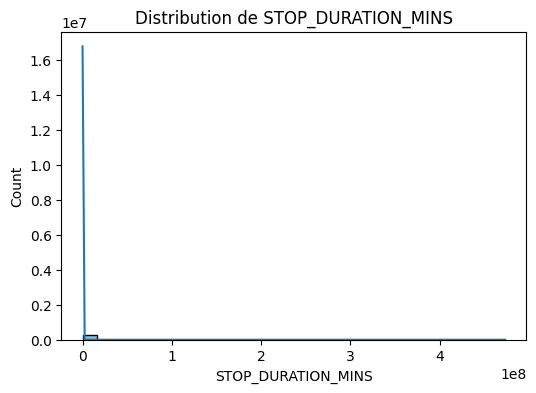

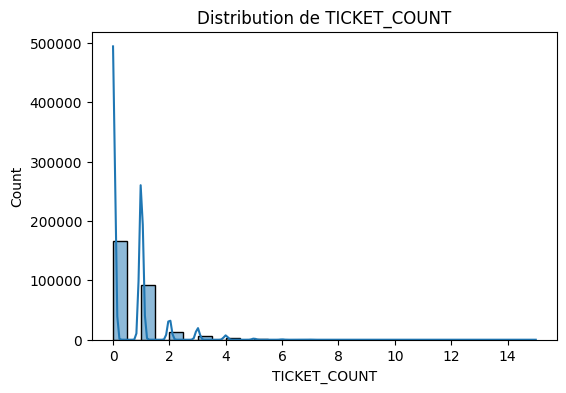

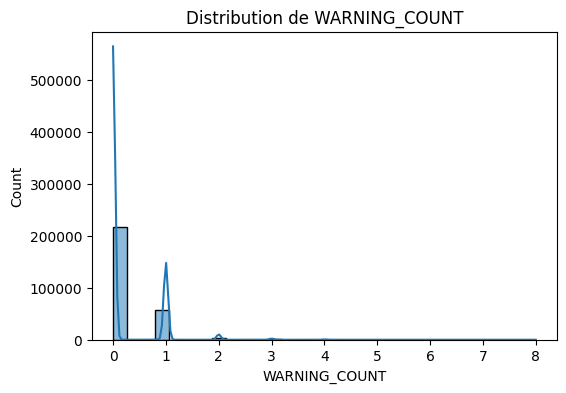

In [ ]:
num_cols = ['STOP_DURATION_MINS', 'TICKET_COUNT', 'WARNING_COUNT']
for col in num_cols:
    plot_numeric(col)

In [ ]:
df['STOP_DURATION_MINS'][df['STOP_DURATION_MINS'] > 2000].value_counts()

,count
STOP_DURATION_MINS,
10090.0,6
10085.0,4
10105.0,3
10095.0,3
10087.0,2
10100.0,2
10091.0,2
10110.0,2
10120.0,1


In [ ]:
# prompt: supprime ces nombre de la colonne STOP_DURATION_MINS : 473353934.0, 473353946.0

df = df[~df['STOP_DURATION_MINS'].isin([473353934.0, 473353946.0])]
df = df[df['STOP_DURATION_MINS'] > 0 ]

In [ ]:
df['STOP_DURATION_MINS'].describe()

,STOP_DURATION_MINS
count,276310.000000
mean,18.188010
std,264.733714
min,1.000000
25%,5.000000
50%,10.000000
75%,16.000000
max,110775.000000


Outliers in STOP_DURATION_MINS:
        STOP_DURATION_MINS
6                     45.0
7                     35.0
11                    60.0
12                    60.0
20                    43.0
...                    ...
279846               142.0
279856                35.0
279864               111.0
279908                50.0
279922                60.0

[23065 rows x 1 columns]


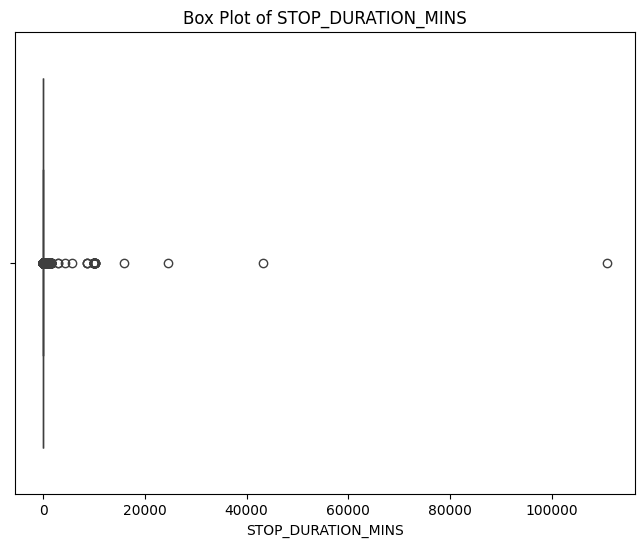

In [ ]:
# prompt: affiche moi les outliers sur STOP_DURATION_MINS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate quantiles for outlier detection
Q1 = df['STOP_DURATION_MINS'].quantile(0.25)
Q3 = df['STOP_DURATION_MINS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['STOP_DURATION_MINS'] < lower_bound) | (df['STOP_DURATION_MINS'] > upper_bound)]

# Print or visualize outliers
print("Outliers in STOP_DURATION_MINS:")
print(outliers[['STOP_DURATION_MINS']]) # Display only the outlier values

# Optional: Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['STOP_DURATION_MINS'])
plt.title('Box Plot of STOP_DURATION_MINS')
plt.show()

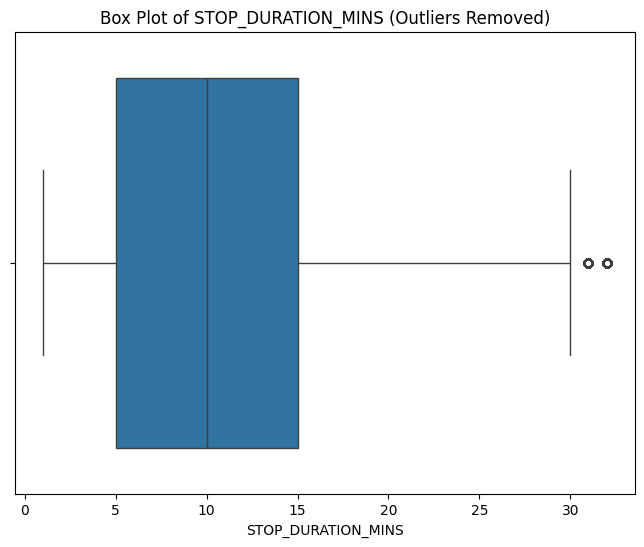

In [ ]:
# prompt: supprime les outiler sur la colonne STOP_DURATION_MINS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code)

# Calculate quantiles for outlier detection
Q1 = df['STOP_DURATION_MINS'].quantile(0.25)
Q3 = df['STOP_DURATION_MINS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers instead of just identifying them
df_no_outliers = df[(df['STOP_DURATION_MINS'] >= lower_bound) & (df['STOP_DURATION_MINS'] <= upper_bound)]

# Now df_no_outliers contains the data without the outliers in 'STOP_DURATION_MINS'

# Optional: Verify the removal by plotting the box plot again
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['STOP_DURATION_MINS'])
plt.title('Box Plot of STOP_DURATION_MINS (Outliers Removed)')
plt.show()

# Continue with your analysis using df_no_outliers


In [ ]:
df_no_outliers['STOP_DURATION_MINS'].describe()

,STOP_DURATION_MINS
count,253245.000000
mean,11.410784
std,6.902771
min,1.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,32.000000


<Axes: >

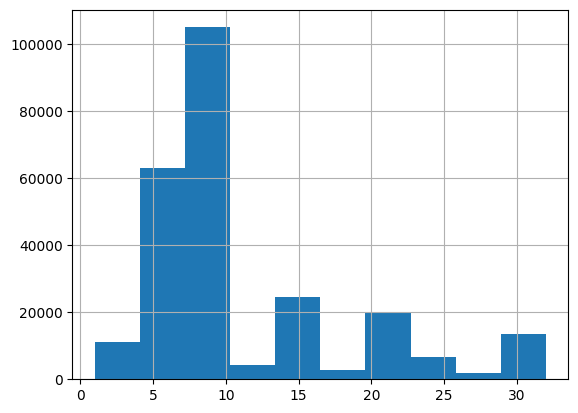

In [ ]:
df_no_outliers['STOP_DURATION_MINS'].hist()

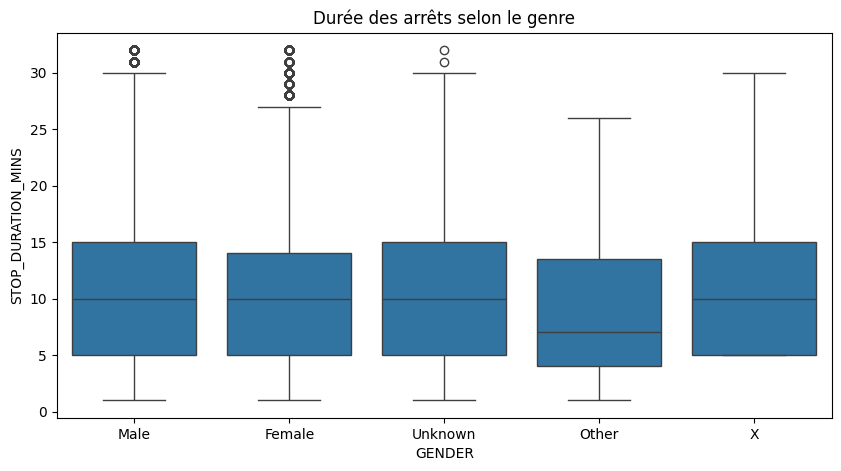

In [ ]:
# --- 5️⃣ Analyse bivariée ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_outliers, x='GENDER', y='STOP_DURATION_MINS')
plt.title("Durée des arrêts selon le genre")
plt.show()

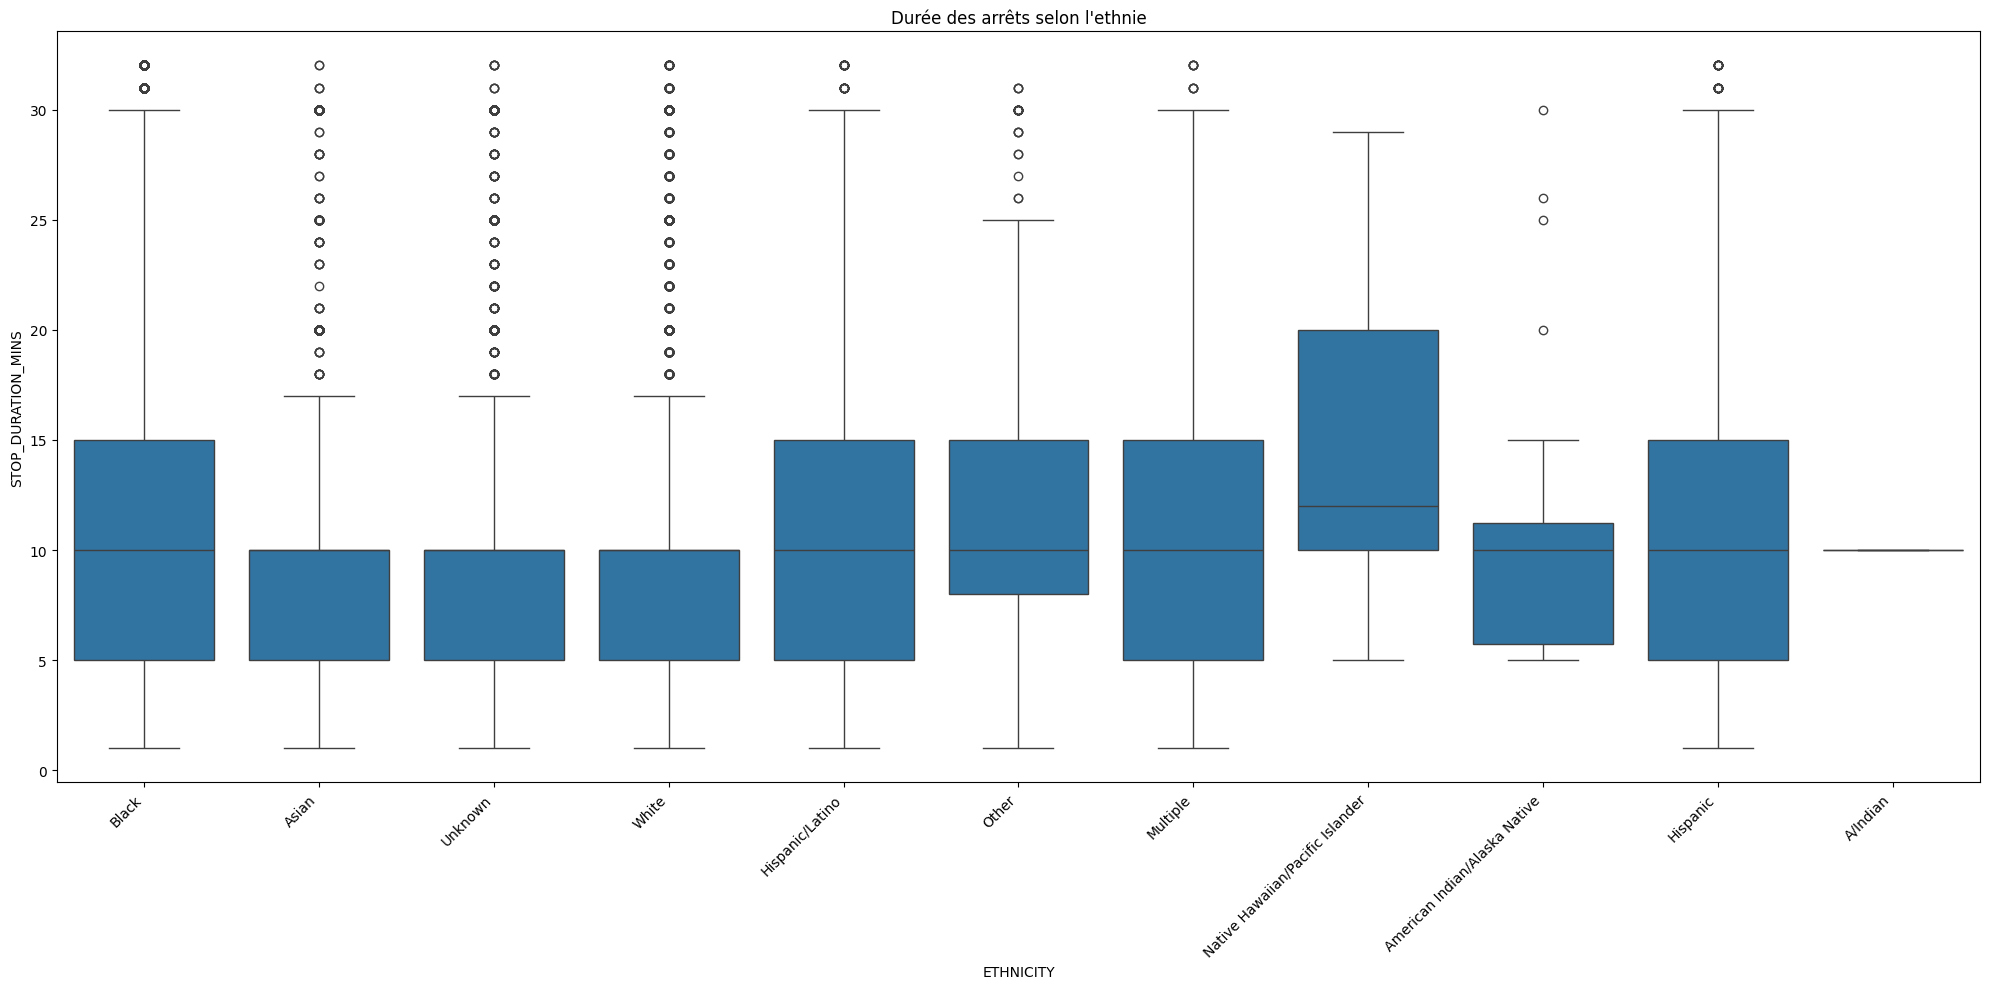

In [ ]:
# --- 5️⃣ Analyse bivariée ---
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers, x='ETHNICITY', y='STOP_DURATION_MINS')

# Rotation des étiquettes de l'axe x (45 degrés) et ajustement de l'alignement
plt.xticks(rotation=45, ha='right')  # ha='right' pour un meilleur alignement

plt.title("Durée des arrêts selon l'ethnie")
plt.tight_layout()  # Ajuste automatiquement l'espacement
plt.show()

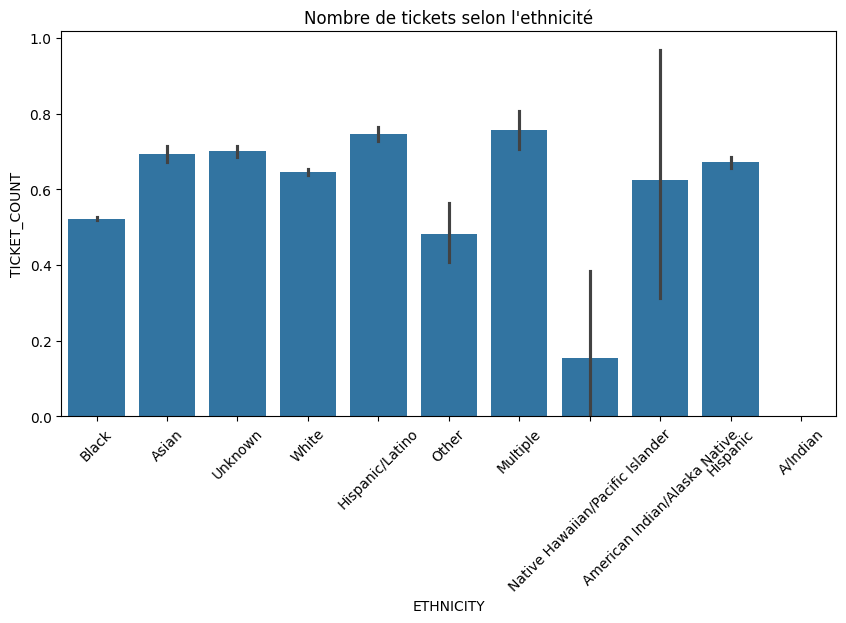

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_no_outliers, x='ETHNICITY', y='TICKET_COUNT')
plt.xticks(rotation=45)
plt.title("Nombre de tickets selon l'ethnicité")
plt.show()

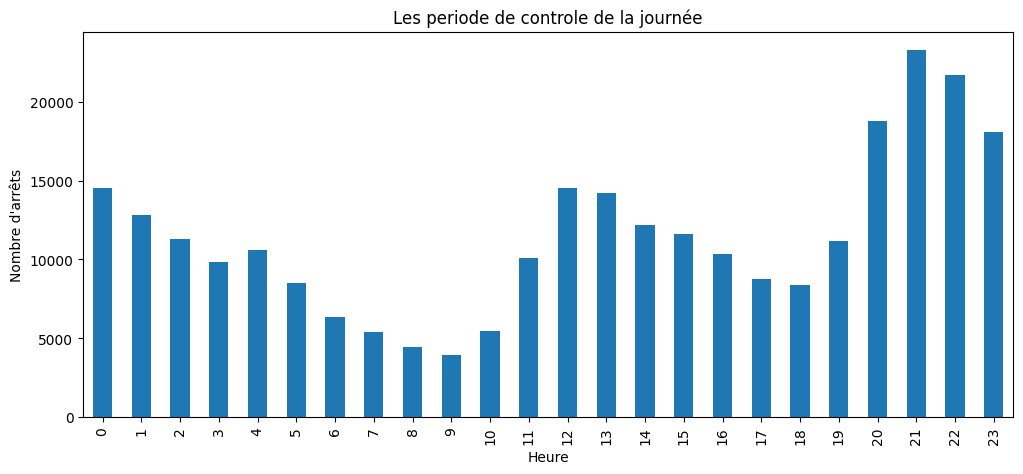

In [ ]:
# --- 6️⃣ Analyse temporelle ---
df['DATETIME'] = pd.to_datetime(df['DATETIME'])  # Conversion
plt.figure(figsize=(12, 5))
df['DATETIME'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title("Les periode de controle de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre d'arrêts")
plt.show()


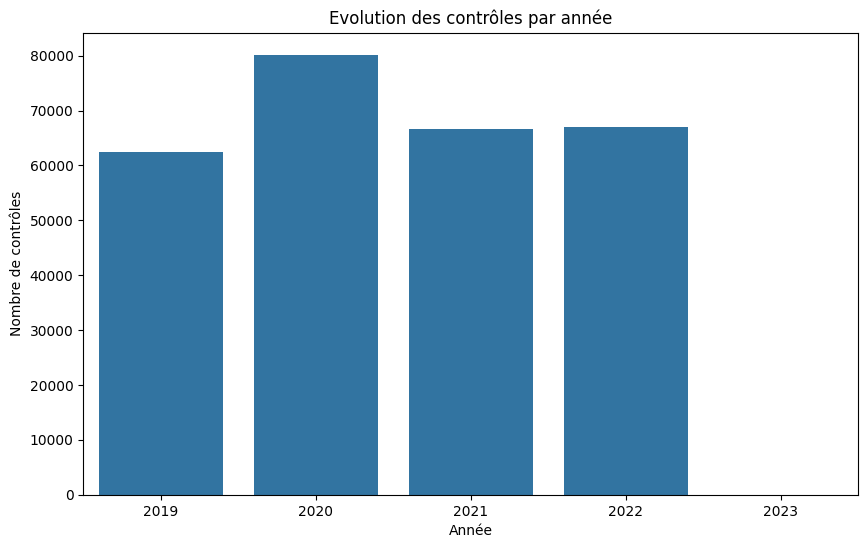

In [ ]:
# prompt: l’evolution des contrôle par année

import pandas as pd
import matplotlib.pyplot as plt
# --- 6️⃣ Analyse temporelle ---


# Extraire l'année
df['YEAR'] = df['DATETIME'].dt.year

# Grouper par année et compter le nombre de contrôles
control_evolution = df.groupby('YEAR')['YEAR'].count()

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=control_evolution.index, y=control_evolution.values)
plt.title("Evolution des contrôles par année")
plt.xlabel("Année")
plt.ylabel("Nombre de contrôles")
plt.show()


<Figure size 1200x800 with 0 Axes>

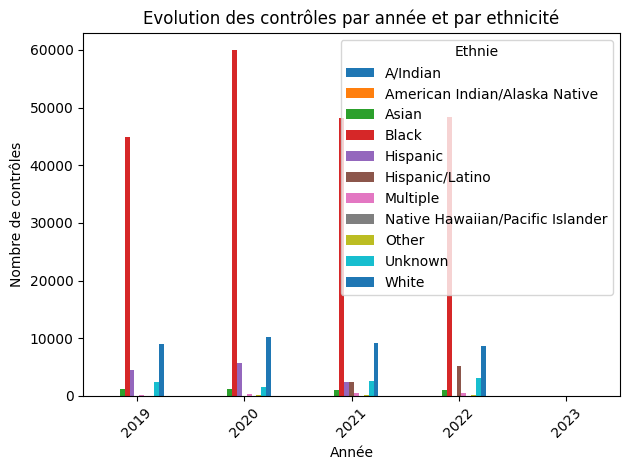

In [ ]:
import matplotlib.pyplot as plt

# --- 6️⃣ Analyse temporelle et Ethnie ---

# Grouper par année et ethnicité, puis compter le nombre de contrôles
control_evolution_ethnie = df.groupby(['YEAR', 'ETHNICITY'])['YEAR'].count().unstack()

# Créer le graphique
plt.figure(figsize=(12, 8))
control_evolution_ethnie.plot(kind='bar')
plt.title("Evolution des contrôles par année et par ethnicité")
plt.xlabel("Année")
plt.ylabel("Nombre de contrôles")
plt.xticks(rotation=45)
plt.legend(title="Ethnie")
plt.tight_layout()  # Améliore l'espacement
plt.show()


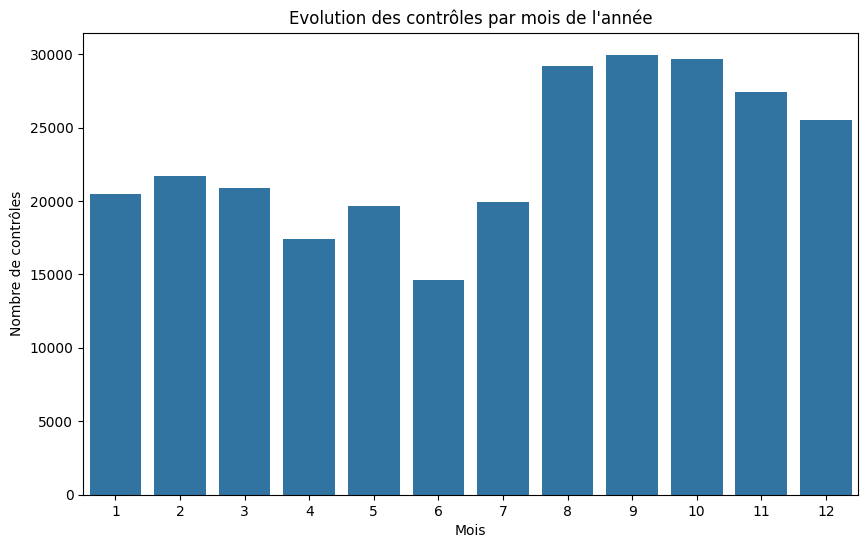

In [ ]:
# prompt: quelle période de l’année ou ya plus de contrôle

import matplotlib.pyplot as plt
# --- 6️⃣ Analyse temporelle et mois de l'année ---

# Extraire le mois
df['MONTH'] = df['DATETIME'].dt.month

# Grouper par mois et compter le nombre de contrôles
control_evolution_month = df.groupby('MONTH')['MONTH'].count()

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=control_evolution_month.index, y=control_evolution_month.values)
plt.title("Evolution des contrôles par mois de l'année")
plt.xlabel("Mois")
plt.ylabel("Nombre de contrôles")
plt.show()


In [ ]:
# prompt: je veux savoir quelle ethnie se fait plus contrôlée dans le cadre d’une enquête, sachant que la colonne de determinant si c’est dans le cadre d’une enquête ou non est la colonne INVESTIGATIVE (1 ou 0 )

# Group data by ethnicity and investigative status, then count occurrences
ethnicity_control = df.groupby(['ETHNICITY', 'INVESTIGATIVE'])['INVESTIGATIVE'].count().unstack()

# Calculate the proportion of investigative stops for each ethnicity
ethnicity_control['Total Stops'] = ethnicity_control.sum(axis=1)
ethnicity_control['Investigative Proportion'] = ethnicity_control[1] / ethnicity_control['Total Stops']

# Sort by the proportion of investigative stops in descending order
ethnicity_control = ethnicity_control.sort_values('Investigative Proportion', ascending=False)

ethnicity_control


INVESTIGATIVE,0,1,Total Stops,Investigative Proportion
ETHNICITY,,,,
Native Hawaiian/Pacific Islander,4.0,14.0,18.0,0.777778
Black,99481.0,101962.0,201443.0,0.506158
Other,210.0,196.0,406.0,0.482759
American Indian/Alaska Native,22.0,20.0,42.0,0.476190
Multiple,764.0,648.0,1412.0,0.458924
Hispanic,8492.0,4287.0,12779.0,0.335472
Hispanic/Latino,5727.0,1960.0,7687.0,0.254976
Unknown,7710.0,2070.0,9780.0,0.211656
White,30688.0,6263.0,36951.0,0.169495


In [ ]:
# prompt: je veux savoir quelle ethnie se fait plus contrôlée dans le cadre d’une TRAFFIC_INVOLVED, sachant que la colonne de determinant si c’est dans le cadre d’une TRAFFIC_INVOLVED ou non est la colonne TRAFFIC_INVOLVED (1 ou 0 )

# Group data by ethnicity and TRAFFIC_INVOLVED status, then count occurrences
ethnicity_traffic = df.groupby(['ETHNICITY', 'TRAFFIC_INVOLVED'])['TRAFFIC_INVOLVED'].count().unstack()

# Calculate the proportion of traffic stops for each ethnicity
ethnicity_traffic['Total Stops'] = ethnicity_traffic.sum(axis=1)
ethnicity_traffic['Traffic Involved Proportion'] = ethnicity_traffic[1] / ethnicity_traffic['Total Stops']

# Sort by the proportion of traffic stops in descending order
ethnicity_traffic = ethnicity_traffic.sort_values('Traffic Involved Proportion', ascending=False)

ethnicity_traffic


TRAFFIC_INVOLVED,0,1,Total Stops,Traffic Involved Proportion
ETHNICITY,,,,
Asian,513.0,4103.0,4616.0,0.888865
White,6248.0,30703.0,36951.0,0.830911
Unknown,1799.0,7981.0,9780.0,0.816053
Hispanic/Latino,1642.0,6045.0,7687.0,0.786393
Hispanic,3614.0,9165.0,12779.0,0.717192
Multiple,529.0,883.0,1412.0,0.625354
Black,85621.0,115822.0,201443.0,0.574962
American Indian/Alaska Native,18.0,24.0,42.0,0.571429
Other,195.0,211.0,406.0,0.519704


Number of vehicle controls: 108581
Number of bicycle/PMD controls: 227
Number of pedestrian controls: 647


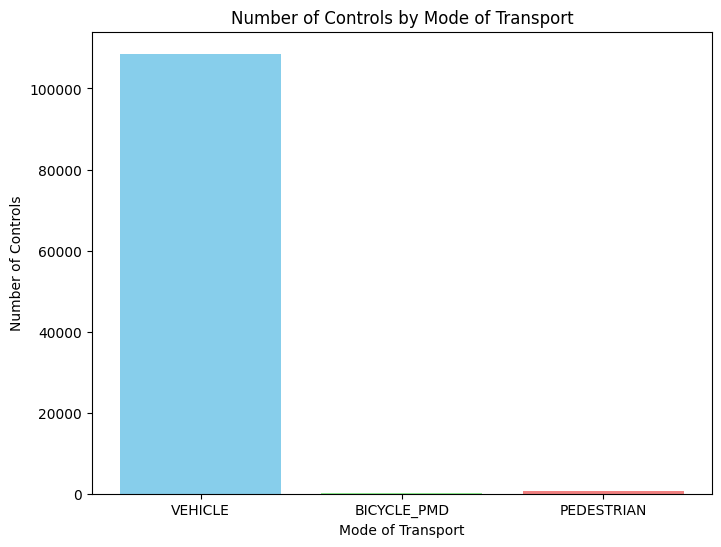

In [ ]:
# prompt: je veux savoir si les gens se font beaucoup contrôlé par voiture ou vélo ou a peids sachant que les colonne respectivement sont : VEHICLE, BICYCLE_PMD et PEDESTRIAN. les colonnes sont boolean (0 ou 1 )

# Calculate the sum of controls for each mode of transport
vehicle_controls = df['VEHICLE'].sum()
bicycle_controls = df['BICYCLE_PMD'].sum()
pedestrian_controls = df['PEDESTRIAN'].sum()

# Print the results
print(f"Number of vehicle controls: {vehicle_controls}")
print(f"Number of bicycle/PMD controls: {bicycle_controls}")
print(f"Number of pedestrian controls: {pedestrian_controls}")

# Create a bar plot to visualize the results
import matplotlib.pyplot as plt
import pandas as pd

data = {'Mode of Transport': ['VEHICLE', 'BICYCLE_PMD', 'PEDESTRIAN'],
        'Number of Controls': [vehicle_controls, bicycle_controls, pedestrian_controls]}
df_controls = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df_controls['Mode of Transport'], df_controls['Number of Controls'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Number of Controls by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Number of Controls')
plt.show()


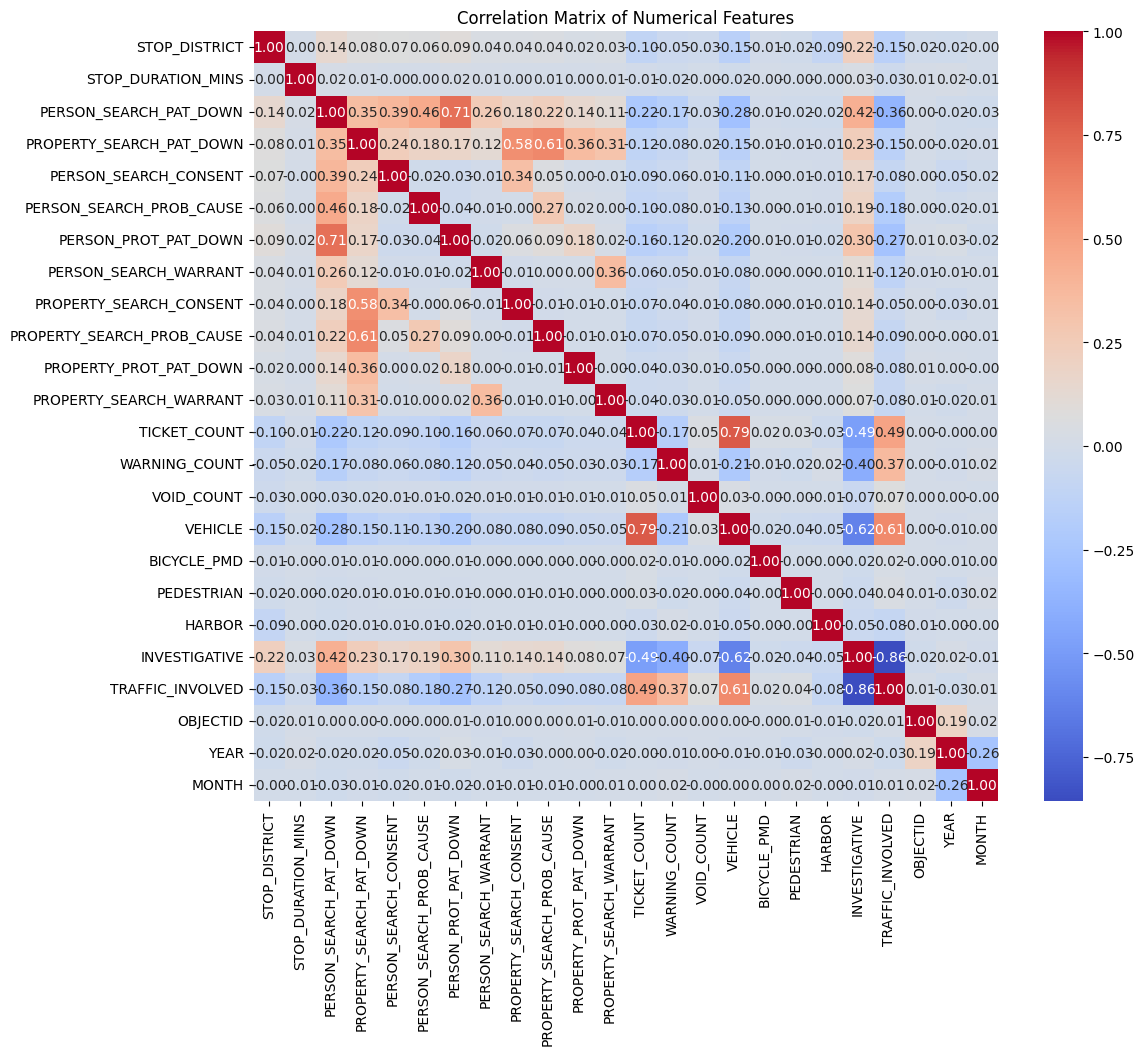

In [ ]:
# Select only numerical columns, excluding specified ones
numerical_cols = df.select_dtypes(include=['number']).columns
cols_to_exclude = ['GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED']
cols_to_include = [col for col in numerical_cols if col not in cols_to_exclude]

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[cols_to_include].corr()


# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
df_no_outliers['TICKET_COUNT'].describe()

,TICKET_COUNT
count,253245.000000
mean,0.565188
std,0.832507
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,15.000000


In [ ]:
df_no_outliers[df_no_outliers['TICKET_COUNT'] == 15.000000]

,CCN_ANONYMIZED,STOP_TYPE,DATETIME,STOP_LOCATION,STOP_DISTRICT,STOP_DURATION_MINS,STOP_REASON_NONTICKET,STOP_REASON_HARBOR,STOP_REASON_TICKET,PERSON_SEARCH_PAT_DOWN,...,INVESTIGATIVE,TRAFFIC_INVOLVED,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID,Age_Category
59669,0x3D2BE30B212A15828C32A5EA28A28F33AAD303F8AF3B...,Ticket and Non-ticket Stop,2021/02/20 20:55:00+00,"2900 BLOCK OF 5TH STREET SE WASHINGTON, DC 200...",7.0,30.0,Individual<U+0092>s actions; Information obtai...,NaN,Response to Crash,0,...,1,1,NaN,NaN,NaN,NaN,NaN,339990,{6EEA353B-1D0A-4D47-BC0E-92D47C04047C},Adult (25-39)


In [ ]:
# prompt: je veux savoir le temps(minute) moyen entre la dates du contrôle et date d’arrestations des différents ethnies. les colonnes dates du contrôle :  DATETIME, date d'arrestation : ARREST_DATE, ethnie : ETHNICITY. fais attention a ce que le résultat ne soit pas des valeurs négatif

import pandas as pd
# Convert date columns to datetime objects
df_no_outliers['DATETIME'] = pd.to_datetime(df_no_outliers['DATETIME'])
df_no_outliers['ARREST_DATE'] = pd.to_datetime(df_no_outliers['ARREST_DATE'], errors='coerce')

# Calculate the time difference between control and arrest dates
df_no_outliers['TIME_DIFF'] = (df_no_outliers['ARREST_DATE'] - df_no_outliers['DATETIME']).dt.total_seconds() / 60

# Filter out negative time differences and NaN values
df_no_outliers = df_no_outliers[df_no_outliers['TIME_DIFF'] >= 0]
df_no_outliers = df_no_outliers.dropna(subset=['TIME_DIFF'])

# Group data by ethnicity and calculate the mean time difference
mean_time_diff_by_ethnicity = df_no_outliers.groupby('ETHNICITY')['TIME_DIFF'].mean()

mean_time_diff_by_ethnicity


<ipython-input-56-a31170c50378>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['DATETIME'] = pd.to_datetime(df_no_outliers['DATETIME'])
<ipython-input-56-a31170c50378>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['ARREST_DATE'] = pd.to_datetime(df_no_outliers['ARREST_DATE'], errors='coerce')
<ipython-input-56-a31170c50378>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,TIME_DIFF
ETHNICITY,
American Indian/Alaska Native,15.285714
Asian,4398.772727
Black,527.680886
Hispanic,14189.590361
Hispanic/Latino,92.233202
Multiple,130.864198
Native Hawaiian/Pacific Islander,3592.000000
Other,3436.094340
Unknown,530.875000


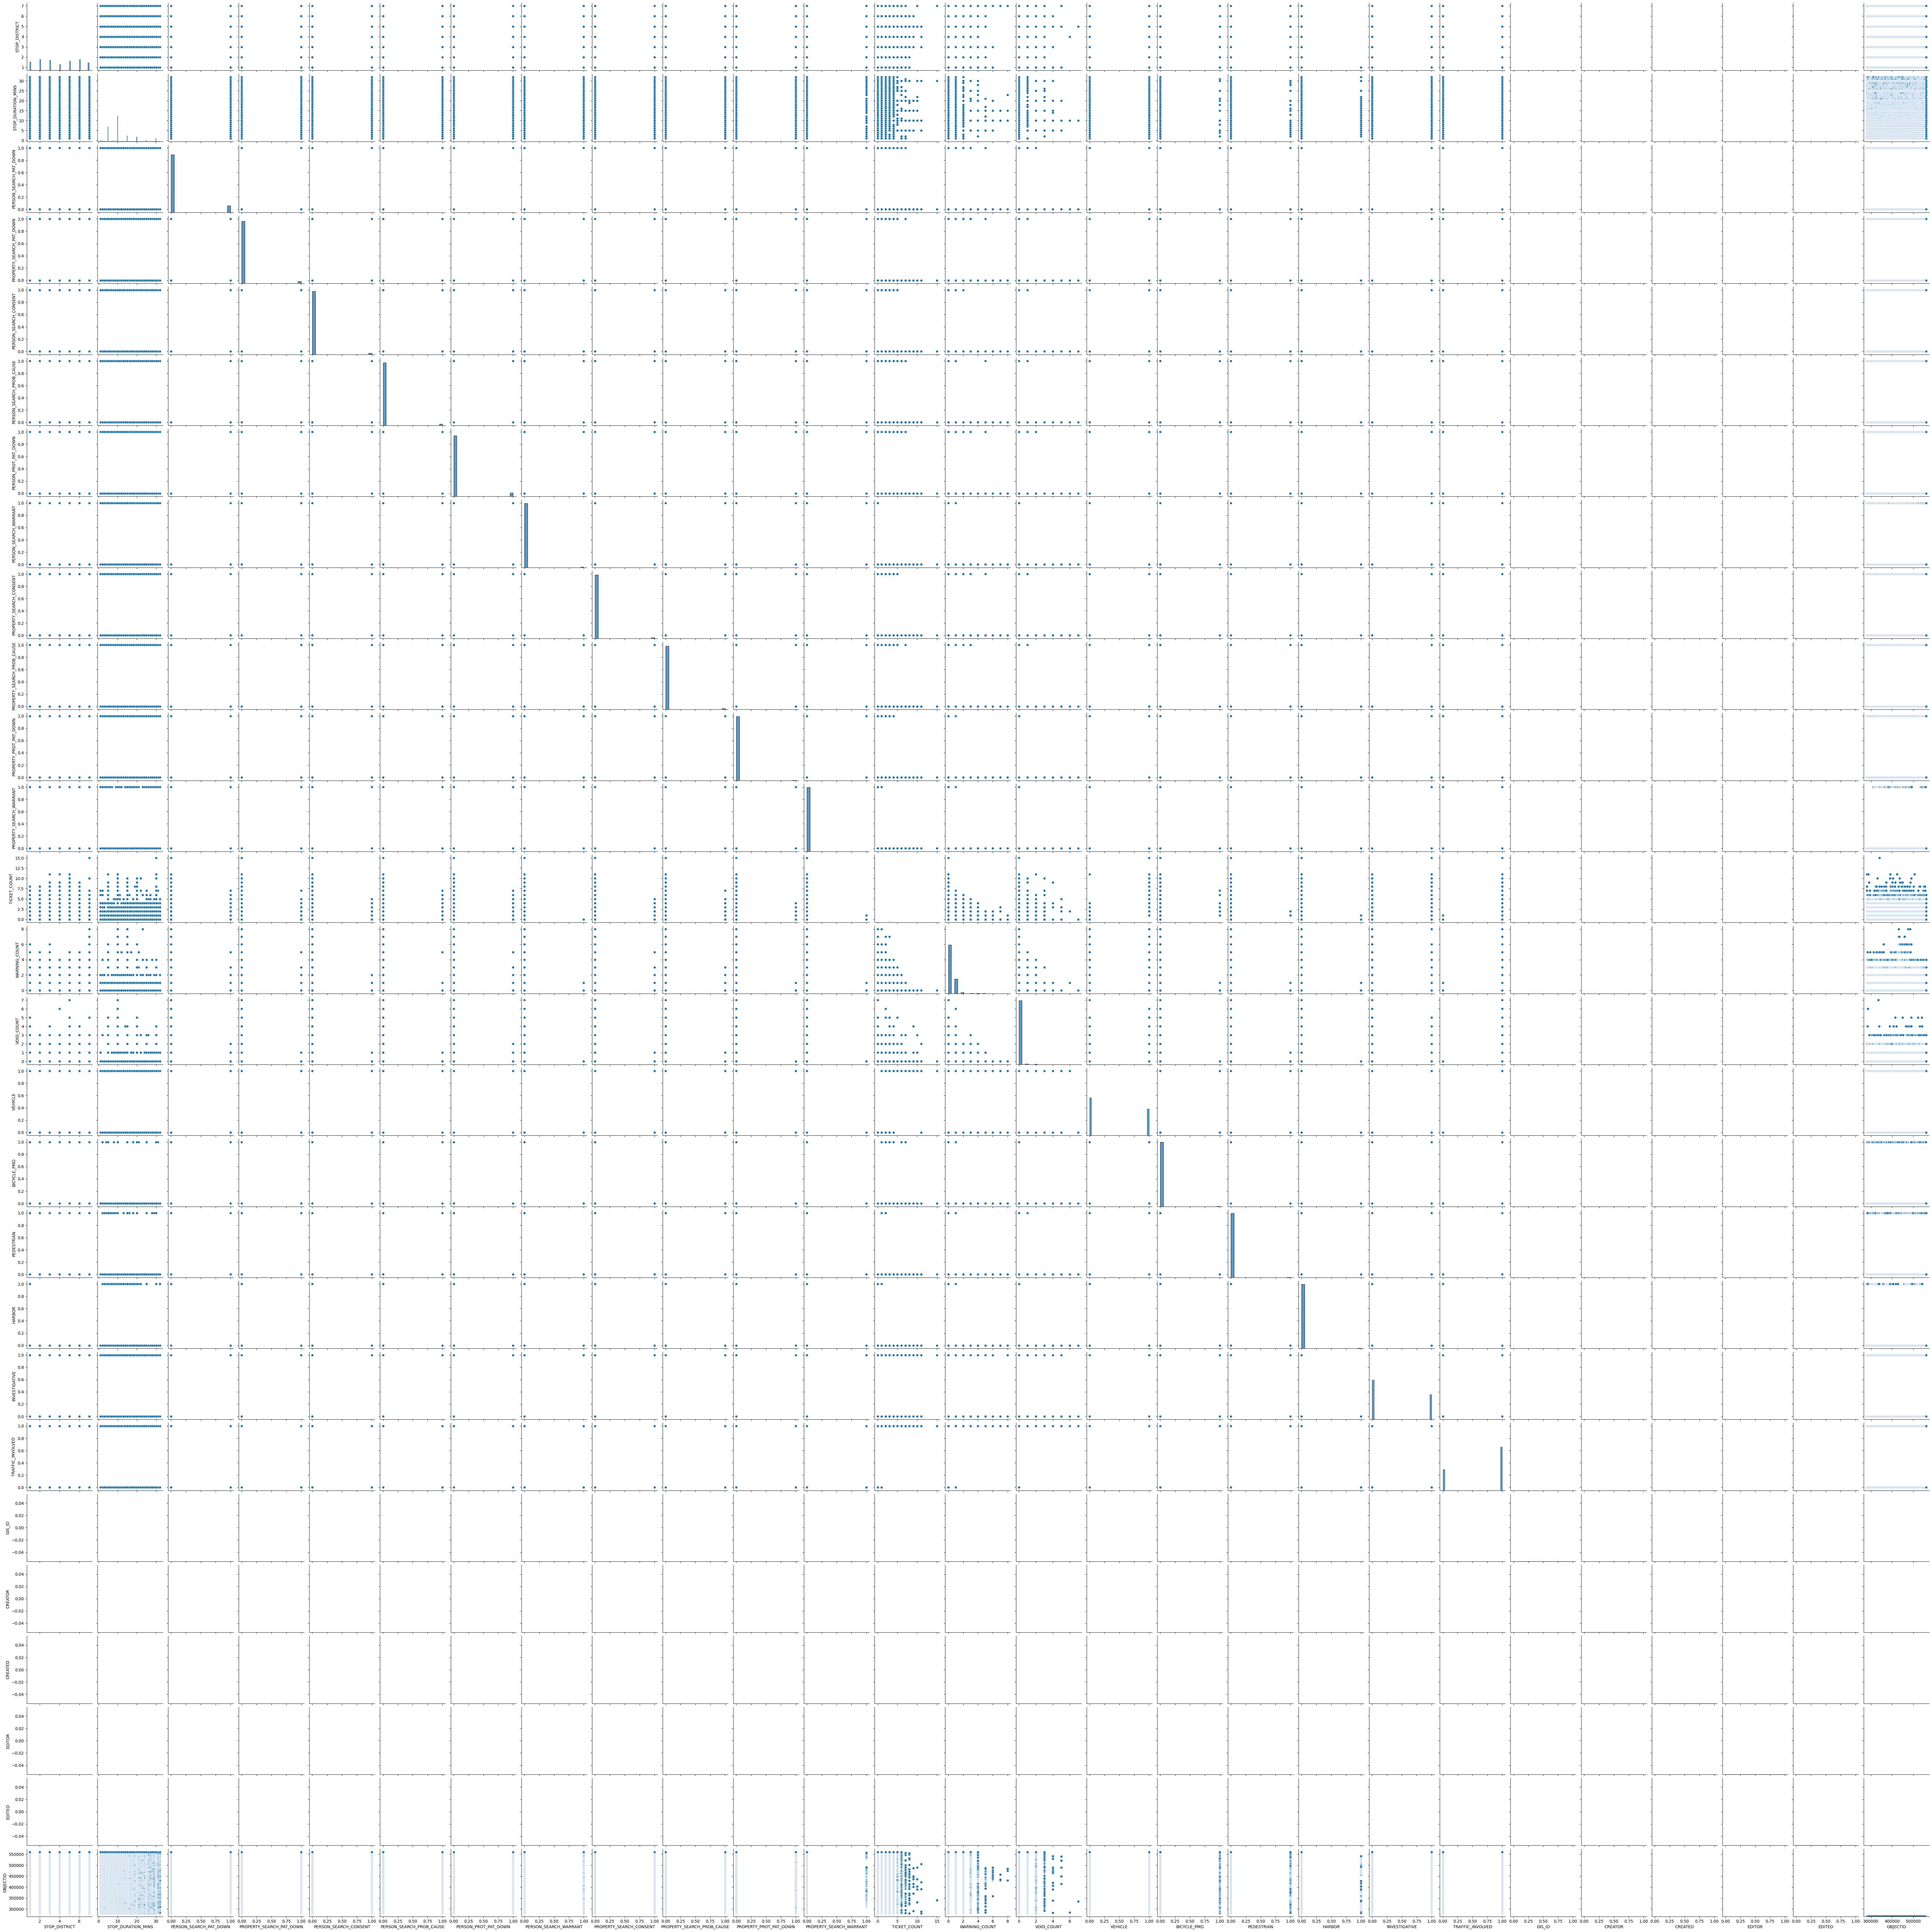

In [ ]:
sns.pairplot(df_no_outliers)